In [54]:
% matplotlib inline
import random
import numpy as np
import networkx as nx

from matplotlib import pyplot as plt
from tqdm import tqdm

from graph_tool.all import load_graph, shortest_distance, GraphView, pbfs_search, BFSVisitor, Graph, min_spanning_tree, label_components
from networkx.drawing.nx_agraph import graphviz_layout

from cascade import gen_nontrivial_cascade
from utils import get_rank_index, extract_edges_from_pred, init_visitor
from ic import get_infection_time
from viz_helpers import default_plot_setting, visualize
from utils import earliest_obs_node
from tqdm import tqdm
from feasibility import is_order_respected, is_feasible
from core import find_tree_by_closure



# seed = 123456
# random.seed(seed)
# np.random.seed(seed)

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.075

pos = graphviz_layout(gnx, root=0)

fig_dirname = 'figs/closure'


In [46]:
infection_times, source, obs_nodes, true_tree = gen_nontrivial_cascade(g, p, q, model='si', return_tree=True,
                                                                       source_includable=True)

if source not in obs_nodes:
    obs_nodes = list(obs_nodes) + [source]
root = source

In [47]:
closure_tree, closure, mst_tree = find_tree_by_closure(
    g, root, infection_times, obs_nodes,
    strictly_smaller=False,
    debug=False,
    verbose=False,
    return_closure=True
)

In [68]:
plt.style.use('paper')

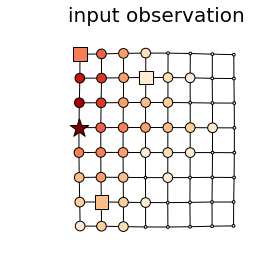

In [69]:
from plot_utils import plot_snapshot, add_colorbar
from utils import extract_edges

with_label = False
max_node_size = 750
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ax.axis('off')
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=with_label,
              max_node_size=max_node_size,
              ax=ax,
              edges=[])
ax.set_title('input observation')
fig.tight_layout()

fig.savefig('{}/input.png'.format(fig_dirname))

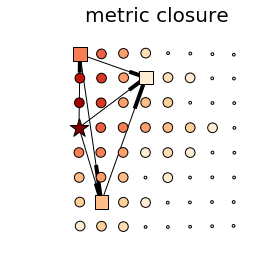

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ax.axis('off')
plot_snapshot(gnx.to_directed(),
              pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=with_label,
              max_node_size=max_node_size,
              ax=ax,
              edges=extract_edges(closure),
              arrows=True)
ax.set_title('metric closure')
fig.tight_layout()
fig.savefig('{}/closure.png'.format(fig_dirname))

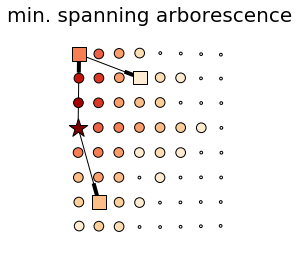

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ax.axis('off')
plot_snapshot(gnx.to_directed(),
              pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=with_label,
              max_node_size=max_node_size,
              ax=ax,
              edges=extract_edges(mst_tree),
              arrows=True)
ax.set_title('min. spanning arborescence')
fig.tight_layout()
fig.savefig('{}/mst.png'.format(fig_dirname))

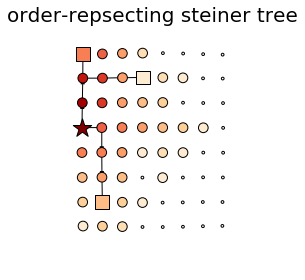

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
ax.axis('off')
plot_snapshot(gnx.to_directed(),
              pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=with_label,
              max_node_size=max_node_size,
              ax=ax,
              edges=extract_edges(closure_tree),
              arrows=True)
ax.set_title('order-repsecting steiner tree')
fig.tight_layout()
fig.savefig('{}/recons-tree.png'.format(fig_dirname))